# 6장 웹 스크레이핑

## 6.1 웹 스크레이핑을 위한 기본 지식

### 6.1.1 웹 스크레이핑의 과정

### 6.1.2 웹 스크레이핑 시 주의 사항

#### 주요 주의 사항

#### 웹 사이트 이용 규약

### 6.1.3 웹 데이터의 요청과 응답 과정

### 6.1.4 웹 페이지 언어(HTML) 구조

[6장: 215페이지]

In [56]:
%%writefile C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example.html         
<!doctype html>
<html>
 <head>
  <meta charset="utf-8">
  <title>이것은 HTML 예제</title>
 </head>
 <body>
  <h1>출간된 책 정보</h1>
  <p id="book_title">이해가 쏙쏙 되는 파이썬</p>
  <p id="author">홍길동</p>
  <p id="publisher">위키북스 출판사</p>
  <p id="year">2018</p>
 </body>
</html>

Overwriting C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example.html


[6장: 216페이지]

In [57]:
%%writefile C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example2.html 
<!doctype html>
<html>
 <head>
  <meta charset="utf-8">
  <title>이것은 HTML 예제</title>
 </head>
 <body>
  <h1>출간된 책 정보</h1>
  <p>이해가 쏙쏙 되는 파이썬</p>
  <p>홍길동</p>
  <p>위키북스 출판사</p>
  <p>2018</p>
  </body>
</html>

Overwriting C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example2.html


### 6.1.5 웹 페이지의 소스 가져오기

#### 웹 브라우저로 웹 페이지 소스 보기

####  requests 라이브러리 활용

####  GET 메서드로 웹 사이트의 소스 가져오기

[6장: 220페이지]

In [58]:
import requests

r = requests.get("https://www.google.co.kr")
r

<Response [200]>

In [59]:
r.status_code

200

[6장: 221페이지]

In [60]:
r.text[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

In [61]:
r.headers

{'Date': 'Wed, 10 May 2023 15:31:14 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=EUC-KR', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-MnxexF9oCOqwW7g43iRTFw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-05-10-15; expires=Fri, 09-Jun-2023 15:31:15 GMT; path=/; domain=.google.co.kr; Secure, AEC=AUEFqZdpk1dZ4_5FhcL6IZ4VptzrlaCysBn2x14W2MDp0BIiBDYscD2BDg; expires=Mon, 06-Nov-2023 15:31:15 GMT; path=/; domain=.google.co.kr; Secure; HttpOnly; SameSite=lax, NID=511=BDepU6whhvMVU1IA0vbMN84TVcIOyIjf4jkrVinHSUBZtObgXHfPDtnY-YWti6Z7vJ5mW1wG1OboQ5vHJPQZJE5LMlJRQavWO1IBd_AOzQaO_ApkFGms7hz2s0WWzpSRVmQUzCKdOvkD3jSQB

In [62]:
import requests

html = requests.get("https://www.google.co.kr").text
html[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

### 6.1.6 웹 페이지의 소스 분석하고 처리하기

#### 데이터 찾고 추출하기

[6장: 222페이지]

In [63]:
from bs4 import BeautifulSoup

# 테스트용 html 소스
html = """<html><body><div><span>\
        <a href=http://www.naver.com>naver</a>\
        <a href=https://www.google.com>google</a>\
        <a href=http://www.daum.net/>daum</a>\
        </span></div></body></html>""" 

# BeautifulSoup를 이용해 HTML 소스를 파싱
soup = BeautifulSoup(html, 'lxml') 
soup

<html><body><div><span> <a href="http://www.naver.com">naver</a> <a href="https://www.google.com">google</a> <a href="http://www.daum.net/">daum</a> </span></div></body></html>

In [64]:
print(soup.prettify())

<html>
 <body>
  <div>
   <span>
    <a href="http://www.naver.com">
     naver
    </a>
    <a href="https://www.google.com">
     google
    </a>
    <a href="http://www.daum.net/">
     daum
    </a>
   </span>
  </div>
 </body>
</html>


[6장: 224페이지]

In [65]:
soup.find('a')

<a href="http://www.naver.com">naver</a>

In [66]:
soup.find('a').get_text()

'naver'

In [67]:
soup.find('a')['href'] # soup.find('a').get('href') 도 동일

'http://www.naver.com'

[6장: 225페이지]

In [68]:
soup.find_all('a')

[<a href="http://www.naver.com">naver</a>,
 <a href="https://www.google.com">google</a>,
 <a href="http://www.daum.net/">daum</a>]

In [69]:
[x.get_text() for x in soup.find_all('a')]

['naver', 'google', 'daum']

In [70]:
from bs4 import BeautifulSoup

# 테스트용 HTML 코드
html2 = """
<html>
 <head>
  <title>작품과 작가 모음</title>
 </head>
 <body>
  <h1>책 정보</h1>
  <p id="book_title">토지</p>
  <p id="author">박경리</p>
  
  <p id="book_title">태백산맥</p>
  <p id="author">조정래</p>

  <p id="book_title">감옥으로부터의 사색</p>
  <p id="author">신영복</p>
  </body>
</html>
""" 

soup2 = BeautifulSoup(html2, "lxml")

[6장: 226페이지]

In [71]:
soup2.title

<title>작품과 작가 모음</title>

In [72]:
soup2.body

<body>
<h1>책 정보</h1>
<p id="book_title">토지</p>
<p id="author">박경리</p>
<p id="book_title">태백산맥</p>
<p id="author">조정래</p>
<p id="book_title">감옥으로부터의 사색</p>
<p id="author">신영복</p>
</body>

[6장: 227페이지]

In [73]:
soup2.body.h1

<h1>책 정보</h1>

In [74]:
soup2.p

<p id="book_title">토지</p>

In [75]:
soup2.find_all('p')

[<p id="book_title">토지</p>,
 <p id="author">박경리</p>,
 <p id="book_title">태백산맥</p>,
 <p id="author">조정래</p>,
 <p id="book_title">감옥으로부터의 사색</p>,
 <p id="author">신영복</p>]

[6장: 228페이지]

In [76]:
soup2.find('p', {"id":"book_title"})

<p id="book_title">토지</p>

In [77]:
soup2.find('p', {"id":"author"})

<p id="author">박경리</p>

In [78]:
soup2.find_all('p', {"id":"book_title"})

[<p id="book_title">토지</p>,
 <p id="book_title">태백산맥</p>,
 <p id="book_title">감옥으로부터의 사색</p>]

In [79]:
soup2.find_all('p', {"id":"author"})

[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]

In [80]:
from bs4 import BeautifulSoup

soup2 = BeautifulSoup(html2, "lxml")

book_titles = soup2.find_all('p', {"id":"book_title"})
authors = soup2.find_all('p', {"id":"author"})

for book_title, author in zip(book_titles, authors):
    print(book_title.get_text() + '/' + author.get_text())

토지/박경리
태백산맥/조정래
감옥으로부터의 사색/신영복


[6장: 230페이지]

In [81]:
soup2.select_one('body h1') # body 내의 h1 태그를 갖는 최초의 요소 찾기

<h1>책 정보</h1>

In [82]:
soup2.select('body h1') # body 내의 h1 태그를 갖는 모든 요소 찾기 

[<h1>책 정보</h1>]

In [83]:
soup2.select_one('body p')

<p id="book_title">토지</p>

In [84]:
soup2.select('body p')

[<p id="book_title">토지</p>,
 <p id="author">박경리</p>,
 <p id="book_title">태백산맥</p>,
 <p id="author">조정래</p>,
 <p id="book_title">감옥으로부터의 사색</p>,
 <p id="author">신영복</p>]

In [85]:
soup2.select('p')

[<p id="book_title">토지</p>,
 <p id="author">박경리</p>,
 <p id="book_title">태백산맥</p>,
 <p id="author">조정래</p>,
 <p id="book_title">감옥으로부터의 사색</p>,
 <p id="author">신영복</p>]

[6장: 231페이지]

In [86]:
soup2.select('p#book_title')

[<p id="book_title">토지</p>,
 <p id="book_title">태백산맥</p>,
 <p id="book_title">감옥으로부터의 사색</p>]

In [87]:
soup2.select('p#author')

[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]

In [88]:
%%writefile C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example_my_site.html 
<!doctype html>
<html>
  <head>
    <meta charset="utf-8">
    <title>사이트 모음</title>
  </head>
  <body>
    <p id="title"><b>자주 가는 사이트 모음</b></p>
    <p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p>
    <a href="http://www.naver.com" class="portal" id="naver">네이버</a> <br>
    <a href="https://www.google.com" class="search" id="google">구글</a> <br>
    <a href="http://www.daum.net" class="portal" id="daum">다음</a> <br>
    <a href="http://www.nl.go.kr" class="government" id="nl">국립중앙도서관</a>
  </body>
</html>

Overwriting C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example_my_site.html


[6장: 232페이지]

In [89]:
f = open('C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/HTML_example_my_site.html', encoding='utf-8')

html3 = f.read()
f.close()

soup3 = BeautifulSoup(html3, "lxml")

In [90]:
soup3.select('a')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="search" href="https://www.google.com" id="google">구글</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>,
 <a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>]

[6장: 233페이지]

In [91]:
soup3.select('a.portal')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>]

In [92]:
soup3.select_one('a').get_text()

'네이버'

In [93]:
[x.get_text() for x in soup3.select('a')]

['네이버', '구글', '다음', '국립중앙도서관']

#### 웹 브라우저의 요소 검사

[6장: 235페이지]

In [94]:
soup3.select('a')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="search" href="https://www.google.com" id="google">구글</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>,
 <a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>]

In [95]:
soup3.select('a.portal')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>]

[6장: 236페이지]

In [96]:
soup3.select('a#naver')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>]

In [97]:
soup3.select('a#naver.portal')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>]

In [98]:
soup3.select('a.portal#naver')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>]

### 6.1.7 웹 사이트 주소에 부가 정보 추가하기

#### 웹 사이트 주소에 경로 추가하기

[6장: 237페이지]

In [99]:
base_url = "https://api.github.com/"
sub_dir = "events"
url = base_url + sub_dir
print(url)

https://api.github.com/events


In [100]:
import requests

base_url = "https://api.github.com/"
sub_dirs = ["events", "user", "emails"]

for sub_dir in sub_dirs:
    url_dir = base_url + sub_dir
    r = requests.get(url_dir)
    print(r.url)

https://api.github.com/events
https://api.github.com/user
https://api.github.com/emails


#### 웹 사이트 주소에 매개변수 추가하기

[6장: 238페이지]

In [101]:
import requests

where_value = 'nexearch' 
sm_value = 'top_hty'
fbm_value = 1
ie_value = 'utf8'
query_value = 'python'

base_url = "https://search.naver.com/search.naver"
parameter = "?where={0}&sm={1}&fbm={2}&ie={3}&query={4}".format(where_value, sm_value, fbm_value, ie_value, query_value)
url_para = base_url + parameter
r = requests.get(url_para)

print(r.url)

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=python


[6장: 239페이지]

In [102]:
import requests  

where_value = 'nexearch' 
sm_value = 'top_hty'
fbm_value = 1
ie_value = 'utf8'
query_value = 'python'

url = "https://search.naver.com/search.naver"
parameters = {"where":where_value, "sm":sm_value, "fbm":fbm_value, "ie":ie_value, "query":query_value}
r = requests.get(url, params=parameters)
print(r.url)

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=python


## 6.2 웹 사이트에서 데이터 가져오기

### 6.2.1 날씨 정보 가져오기

#### 웹 사이트 분석해 날씨 정보 가져오기

[6장: 241페이지]

In [103]:
import requests  
from bs4 import BeautifulSoup 

location = "서울시 종로구 청운동"
search_query = location + " 날씨"
search_url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q="
url = search_url + search_query

html_weather = requests.get(url).text
soup_weather = BeautifulSoup(html_weather, "lxml")
print(url)

https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=서울시 종로구 청운동 날씨


[6장: 243페이지]

In [104]:
txt_temp = soup_weather.select_one('strong.txt_temp').get_text()
txt_temp

'16℃'

In [105]:
txt_weather = soup_weather.select_one('span.txt_weather').get_text()
txt_weather

'23시 현재, 맑음'

In [106]:
dl_weather_dds = soup_weather.select('dl.dl_weather dd')
dl_weather_dds

[<dd>2.5m/s</dd>, <dd>52%</dd>, <dd class="dust_type2">보통 (42㎍/㎥)</dd>]

[6장: 244페이지]

In [107]:
[wind_speed, humidity, pm10] = [x.get_text() for x in dl_weather_dds]

print(f"현재 풍속: {wind_speed}, 현재 습도: {humidity}, 미세 먼지: {pm10}")

현재 풍속: 2.5m/s, 현재 습도: 52%, 미세 먼지: 보통 (42㎍/㎥)


In [108]:
import requests  
from bs4 import BeautifulSoup 
import time

def get_weather_daum(location):
    search_query = location + " 날씨"
    search_url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q="
    url = search_url + search_query
    html_weather = requests.get(url).text
    time.sleep(2)    
    soup_weather = BeautifulSoup(html_weather, "lxml")
    
    txt_temp = soup_weather.select_one('strong.txt_temp').get_text()
    txt_weather = soup_weather.select_one('span.txt_weather').get_text()

    dl_weather_dds = soup_weather.select('dl.dl_weather dd')
    [wind_speed, humidity, pm10] = [x.get_text() for x in dl_weather_dds]
    
    return (txt_temp, txt_weather, wind_speed, humidity, pm10)

In [109]:
location = "서울시 종로구 청운동" # 날씨를 알고 싶은 지역 
get_weather_daum(location)        # 함수 호출

('16℃', '23시 현재, 맑음', '2.5m/s', '52%', '보통 (42㎍/㎥)')

[6장: 245페이지]

In [110]:
location = "경기도 수원시" # 날씨를 알고 싶은 지역 

(txt_temp, txt_weather, wind_speed, humidity, pm10) = get_weather_daum(location)

print("-------[오늘의 날씨 정보] (Daum) ----------")
print(f"- 설정 지역: {location}")
print(f"- 기온: {txt_temp}")
print(f"- 날씨 정보: {txt_weather} ", )
print(f"- 현재 풍속: {wind_speed}, 현재 습도: {humidity}, 미세 먼지: {pm10}")

-------[오늘의 날씨 정보] (Daum) ----------
- 설정 지역: 경기도 수원시
- 기온: 13℃
- 날씨 정보: 23시 현재, 맑음 
- 현재 풍속: 0.3m/s, 현재 습도: 70%, 미세 먼지: 보통 (59㎍/㎥)


#### 날씨 정보 주기적으로 가져오기

[6장: 245페이지]

In [111]:
import schedule
import time
from datetime import datetime

# 작업을 위한 함수 지정
def job():
    now = datetime.now()
    print("[작업 수행 시각] {:%H:%M:%S}".format(now))
    location = "경기도 수원시" # 날씨를 알고 싶은 지역 

    (txt_temp, txt_weather, wind_speed, humidity, pm10) = get_weather_daum(location)

    print("-------[오늘의 날씨 정보] (Daum) ----------")
    print(f"- 설정 지역: {location}")
    print(f"- 기온: {txt_temp}")
    print(f"- 날씨 정보: {txt_weather} ", )
    print(f"- 현재 풍속: {wind_speed}, 현재 습도: {humidity}, 미세 먼지: {pm10}")

# 코드 테스트를 위해 5초마다 날씨 정보 가져와 출력하기 위한 스케줄 설정
schedule.every(5).seconds.do(job)  # 5초(second)마다 job() 함수 실행

# -- 매일 지정한 시각에 날씨 정보를 가져와 출력하기 위한 스케줄 설정
# schedule.every().day.at("07:00").do(job) # 매일 07시에 job() 함수 실행
# schedule.every().day.at("12:00").do(job) # 매일 12시에 job() 함수 실행
# schedule.every().day.at("18:00").do(job) # 매일 18시에 job() 함수 실행

while True:
    try:
        schedule.run_pending()
        time.sleep(1)
    except:
        print("작업 강제 종료")
        schedule.clear()  # 기본 스케줄러 객체를 제거          
        break            # while 문을 빠져 나옴

[작업 수행 시각] 00:31:33
-------[오늘의 날씨 정보] (Daum) ----------
- 설정 지역: 경기도 수원시
- 기온: 13℃
- 날씨 정보: 23시 현재, 맑음 
- 현재 풍속: 0.3m/s, 현재 습도: 70%, 미세 먼지: 보통 (59㎍/㎥)
[작업 수행 시각] 00:31:40
-------[오늘의 날씨 정보] (Daum) ----------
- 설정 지역: 경기도 수원시
- 기온: 13℃
- 날씨 정보: 23시 현재, 맑음 
- 현재 풍속: 0.3m/s, 현재 습도: 70%, 미세 먼지: 보통 (59㎍/㎥)
[작업 수행 시각] 00:31:48
-------[오늘의 날씨 정보] (Daum) ----------
- 설정 지역: 경기도 수원시
- 기온: 13℃
- 날씨 정보: 23시 현재, 맑음 
- 현재 풍속: 0.3m/s, 현재 습도: 70%, 미세 먼지: 보통 (59㎍/㎥)
[작업 수행 시각] 00:31:55
-------[오늘의 날씨 정보] (Daum) ----------
- 설정 지역: 경기도 수원시
- 기온: 13℃
- 날씨 정보: 23시 현재, 맑음 
- 현재 풍속: 0.3m/s, 현재 습도: 70%, 미세 먼지: 보통 (59㎍/㎥)
[작업 수행 시각] 00:32:02
작업 강제 종료


### 6.2.2 주식 정보 가져오기

#### 주식 현재가 가져오기

[6장: 248페이지]

In [112]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://finance.naver.com/item/main.nhn'
stock_code = "005930"
url = base_url + "?code=" + stock_code

html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')

print(url)

https://finance.naver.com/item/main.nhn?code=005930


[6장: 250페이지]

In [113]:
soup.select_one('p.no_today')

<p class="no_today">
<em class="no_down">
<span class="blind">64,600</span>
<span class="no6">6</span><span class="no4">4</span><span class="shim">,</span><span class="no6">6</span><span class="no0">0</span><span class="no0">0</span>
</em>
</p>

In [114]:
stock_price = soup.select_one('p.no_today span.blind').get_text()
stock_price

'64,600'

In [115]:
import requests
from bs4 import BeautifulSoup

def get_current_stock_price(stock_code):
    
    base_url = 'https://finance.naver.com/item/main.nhn'
    url = base_url + "?code=" + stock_code
    
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    
    stock_price = soup.select_one('p.no_today span.blind').get_text()
    
    return stock_price

[6장: 251페이지]

In [116]:
stock_code = "005930"
current_stock_price = get_current_stock_price(stock_code)
current_stock_price

'64,600'

In [117]:
company_stock_codes = {"삼성전자": "005930", "현대차":"005380", "NAVER":"035420"}

print("[현재 주식 가격(원)]")
for company, stock_code in company_stock_codes.items():
    current_stock_price = get_current_stock_price(stock_code)
    print(f"{company}: {current_stock_price}")

[현재 주식 가격(원)]
삼성전자: 64,600
현대차: 210,000
NAVER: 210,000


#### 주식 종목 코드 가져오기

[6장: 252페이지]

In [118]:
import pandas as pd

# 한국 거래소(KRX)에서 전체 상장법인 목록 가져오기
base_url = "http://kind.krx.co.kr/corpgeneral/corpList.do"
method = "download"
url = "{0}?method={1}".format(base_url, method)

df = pd.read_html(url, header=0)[0]

with pd.option_context('display.max_columns',4): # 최대 4개까지 열이 표시하도록 설정
    pd.set_option("show_dimensions", False)      # 행과 열 개수 출력 안 하기
    display(df.head())

,회사명,종목코드,...,홈페이지,지역
0,AJ네트웍스,95570,...,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,...,http://www.bnkfg.com,부산광역시
2,DSR,155660,...,http://www.dsr.com,부산광역시
3,GS,78930,...,NaN,서울특별시
4,HDC현대산업개발,294870,...,http://www.hdc-dvp.com,서울특별시


In [119]:
df['종목코드']= df['종목코드'].apply(lambda x: f"{x:06d}")

with pd.option_context('display.max_columns',4): # 최대 4개까지 열이 표시하도록 설정
    pd.set_option("show_dimensions", False)      # 행과 열 개수 출력 안 하기
    display(df.head())

,회사명,종목코드,...,홈페이지,지역
0,AJ네트웍스,095570,...,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,...,http://www.bnkfg.com,부산광역시
2,DSR,155660,...,http://www.dsr.com,부산광역시
3,GS,078930,...,NaN,서울특별시
4,HDC현대산업개발,294870,...,http://www.hdc-dvp.com,서울특별시


In [120]:
df = df[['회사명','종목코드']]
df.head()

,회사명,종목코드
0,AJ네트웍스,095570
1,BNK금융지주,138930
2,DSR,155660
3,GS,078930
4,HDC현대산업개발,294870


[6장: 254페이지]

In [121]:
import pandas as pd

#----------------------------------------------------
# 한국 주식의 종목 이름과 종목 코드를 가져오는 함수
#----------------------------------------------------
def get_stock_info(maket_type=None):
    # 한국거래소(KRX)에서 전체 상장법인 목록 가져오기
    base_url =  "http://kind.krx.co.kr/corpgeneral/corpList.do"
    method = "download"
    if maket_type == 'kospi':
        marketType = "stockMkt"  # 주식 종목이 코스피인 경우
    elif maket_type == 'kosdaq':
        marketType = "kosdaqMkt" # 주식 종목이 코스닥인 경우
    elif maket_type == None:
        marketType = ""
    url = "{0}?method={1}&marketType={2}".format(base_url, method, marketType)

    df = pd.read_html(url, header=0)[0]
    
    # 종목코드 열을 6자리 숫자로 표시된 문자열로 변환
    df['종목코드']= df['종목코드'].apply(lambda x: f"{x:06d}") 
    
    # 회사명과 종목코드 열 데이터만 남김
    df = df[['회사명','종목코드']]
    
    return df

In [122]:
df_kospi = get_stock_info('kospi')
df_kospi.head()

,회사명,종목코드
0,AJ네트웍스,095570
1,BNK금융지주,138930
2,DSR,155660
3,GS,078930
4,HDC현대산업개발,294870


[6장: 255페이지]

In [123]:
df_kosdaq = get_stock_info('kosdaq')
df_kosdaq.head()

,회사명,종목코드
0,CJ 바이오사이언스,311690
1,DH오토웨어,025440
2,HLB,028300
3,IBKS제17호스팩,405350
4,ISC,095340


In [124]:
#--------------------------------------------------
# 회사 이름을 입력하면 종목 코드를 가져오는 함수
#--------------------------------------------------
def get_stock_code(company_name, maket_type=None):
    df = get_stock_info(maket_type)
    code = df[df['회사명']==company_name]['종목코드'].values
    
    if(code.size !=0):
        code = code[0]    
        return code
    else:
        print(f"[Error]입력한 [{company_name}]에 대한 종목 코드가 없습니다.")

In [125]:
get_stock_code('삼성전자', 'kospi') # 삼성전자 주식 종목 코드 가져오기, 코스피(kospi) 지정

'005930'

[6장: 256페이지]

In [126]:
get_stock_code('삼성전자') # 삼성전자 주식 종목 코드 가져오기, 주식 종류는 지정 안 함

'005930'

In [127]:
get_stock_code('현대차')

[Error]입력한 [현대차]에 대한 종목 코드가 없습니다.


In [128]:
get_stock_code('현대자동차')

'005380'

In [129]:
company_names = ["삼성전자", "현대자동차", "NAVER"]

print("[현재 주식 가격(원)]")
for company_name in company_names:
    stock_code = get_stock_code(company_name)
    current_stock_price = get_current_stock_price(stock_code)
    print(f"{company_name}: {current_stock_price}")

[현재 주식 가격(원)]
삼성전자: 64,600
현대자동차: 210,000
NAVER: 210,000


[6장: 257페이지]

In [130]:
get_stock_code('CJ 바이오사이언스', 'kosdaq') # 주식 종목 코드 가져오기, 코스닥(kosdaq) 지정

'311690'

In [131]:
get_stock_code('CJ 바이오사이언스') # 주식 종목 코드 가져오기, 주식 종류는 지정 안 함

'311690'

### 6.2.3 환율 정보 가져오기

#### 현재의 환율 정보 가져오기

[6장: 259페이지]

In [132]:
import pandas as pd

url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%99%98%EC%9C%A8'

# url에서 표 데이터를 추출해 DataFrame 데이터의 리스트로 반환
dfs = pd.read_html(url)
dfs

[          통화명    매매기준율        전일대비     등락률
 0      미국 USD  1322.00  전일대비하락4.50  -0.34%
 1  일본 JPY 100   983.16  전일대비상승1.55  +0.16%
 2    유럽연합 EUR  1450.50  전일대비하락3.61  -0.25%
 3      중국 CNY   190.50  전일대비하락1.01  -0.53%
 4      영국 GBP  1668.03  전일대비하락4.55  -0.27%
 5      호주 AUD   893.54  전일대비하락3.44  -0.38%
 6     캐나다 CAD   988.12  전일대비하락2.54  -0.26%
 7    뉴질랜드 NZD   839.60  전일대비하락0.07  -0.01%]

[6장: 260페이지]

In [133]:
len(dfs)

1

In [134]:
dfs[0]

,통화명,매매기준율,전일대비,등락률
0,미국 USD,1322.00,전일대비하락4.50,-0.34%
1,일본 JPY 100,983.16,전일대비상승1.55,+0.16%
2,유럽연합 EUR,1450.50,전일대비하락3.61,-0.25%
3,중국 CNY,190.50,전일대비하락1.01,-0.53%
4,영국 GBP,1668.03,전일대비하락4.55,-0.27%
5,호주 AUD,893.54,전일대비하락3.44,-0.38%
6,캐나다 CAD,988.12,전일대비하락2.54,-0.26%
7,뉴질랜드 NZD,839.60,전일대비하락0.07,-0.01%


In [135]:
exchange_rate_df = dfs[0].replace({'전일대비상승': '▲', 
                                   '전일대비하락': '▼'}, regex=True)
exchange_rate_df

,통화명,매매기준율,전일대비,등락률
0,미국 USD,1322.00,▼4.50,-0.34%
1,일본 JPY 100,983.16,▲1.55,+0.16%
2,유럽연합 EUR,1450.50,▼3.61,-0.25%
3,중국 CNY,190.50,▼1.01,-0.53%
4,영국 GBP,1668.03,▼4.55,-0.27%
5,호주 AUD,893.54,▼3.44,-0.38%
6,캐나다 CAD,988.12,▼2.54,-0.26%
7,뉴질랜드 NZD,839.60,▼0.07,-0.01%


[6장: 262페이지]

In [136]:
import pandas as pd

# 네이버 금융의 환율 정보 웹 사이트 주소
url = 'https://finance.naver.com/marketindex/exchangeList.nhn' 

# 웹 사이트의 표 데이터에서 두 번째 줄을 DataFrame 데이터의 columns로 선택
dfs = pd.read_html(url, header=1) 

dfs[0].head() # 전체 데이터 중 앞의 일부분만 표시

,통화명,매매기준율,사실 때,파실 때,보내실 때,받으실 때,미화환산율
0,미국 USD,1322.00,1345.13,1298.87,1334.90,1309.10,1.000
1,유럽연합 EUR,1450.50,1479.36,1421.64,1465.00,1436.00,1.097
2,일본 JPY (100엔),983.16,1000.36,965.96,992.79,973.53,0.744
3,중국 CNY,190.50,200.02,180.98,192.40,188.60,0.144
4,홍콩 HKD,168.85,172.17,165.53,170.53,167.17,0.128


#### 과거의 환율 정보 가져오기

[6장: 264페이지]

In [137]:
import pandas as pd

base_url = "https://finance.naver.com/marketindex/exchangeDailyQuote.nhn"
currency_code = "FX_USDKRW" # 통화 코드
page_num = 1

url = f"{base_url}?marketindexCd={currency_code}&page={page_num}"
dfs = pd.read_html(url, header=1)

# 행과 열의 최대 표시 개수를 임시로 설정
with pd.option_context('display.max_rows',4, 'display.max_columns',6): 
    pd.set_option("show_dimensions", False) # 행과 열 개수 정보 숨기기
    display(dfs[0])

,날짜,매매기준율,전일대비,...,받으실 때,T/C 사실때,외화수표 파실 때
0,2023.05.10,1322.0,4.5,...,1309.1,NaN,1306.57
1,2023.05.09,1326.5,4.5,...,1313.6,NaN,1311.06
...,...,...,...,...,...,...,...
8,2023.04.26,1338.0,4.0,...,1324.9,NaN,1322.36
9,2023.04.25,1342.0,7.0,...,1328.9,NaN,1326.36


[6장: 265페이지]

In [138]:
import pandas as pd
import time

# 날짜별 환율 데이터를 반환하는 함수
# - 입력 인수: currency_code(통화코드), last_page_num(페이지 수)
# - 반환: 환율 데이터
def get_exchange_rate_data(currency_code, last_page_num):
    base_url = "https://finance.naver.com/marketindex/exchangeDailyQuote.nhn"

    df = pd.DataFrame()

    for page_num in range(1, last_page_num+1):
        url = f"{base_url}?marketindexCd={currency_code}&page={page_num}"
        dfs = pd.read_html(url, header=1)

        if dfs[0].empty: # 통화 코드가 잘못 지정됐거나 마지막 페이지의 경우 for 문을 빠져나오기 위한 코드
            if (page_num==1):
                print(f"통화 코드({currency_code})가 잘못 지정됐습니다.")
            else:
                print(f"{page_num}가 마지막 페이지입니다.")
            break

        df = pd.concat([df, dfs[0]], ignore_index=True) # page별로 가져온 DataFrame 데이터 연결
        time.sleep(0.1) # 0.1초간 멈춤
        
    return df

[6장: 266페이지]

In [139]:
df_usd = get_exchange_rate_data('FX_USDKRW', 2)

# 행과 열의 최대 표시 개수를 임시로 설정
with pd.option_context('display.max_rows',4, 'display.max_columns',6):
    pd.set_option("show_dimensions", False) # 행과 열 개수 정보 숨기기
    display(df_usd)

,날짜,매매기준율,전일대비,...,받으실 때,T/C 사실때,외화수표 파실 때
0,2023.05.10,1322.0,4.5,...,1309.1,NaN,1306.57
1,2023.05.09,1326.5,4.5,...,1313.6,NaN,1311.06
...,...,...,...,...,...,...,...
18,2023.04.12,1324.0,1.5,...,1311.1,NaN,1308.63
19,2023.04.11,1322.5,0.5,...,1309.6,NaN,1307.14


[6장: 267페이지]

In [140]:
df_eur = get_exchange_rate_data('FX_EURKRW', 1)

# 행과 열의 최대 표시 개수를 임시로 설정
with pd.option_context('display.max_rows',4, 'display.max_columns',6):
    pd.set_option("show_dimensions", False) # 행과 열 개수 정보 숨기기
    display(df_eur.head())

,날짜,매매기준율,전일대비,...,받으실 때,T/C 사실때,외화수표 파실 때
0,2023.05.10,1450.50,3.61,...,1436.00,NaN,1433.95
1,2023.05.09,1454.11,6.70,...,1439.57,NaN,1437.53
...,...,...,...,...,...,...,...
3,2023.05.04,1456.58,16.65,...,1442.02,NaN,1439.98
4,2023.05.03,1473.23,1.36,...,1458.50,NaN,1456.45


### 6.2.4 부동산 정보 가져오기

[6장: 269페이지]

In [141]:
import pandas as pd

base_url = "https://land.naver.com/news/trendReport.naver"
page_num = 1

url = f"{base_url}?page={page_num}"
dfs = pd.read_html(url)

df = dfs[0] # 리스트의 첫 번째 항목에 동향 보고서 제목 데이터가 있음

# 행과 열의 최대 표시 개수를 임시로 설정
with pd.option_context('display.max_rows',4, 'display.max_columns',6): 
    pd.set_option("show_dimensions", False) # 행과 열 개수 정보 숨기기
    display(df)

,번호,제목,등록일,조회수
0,1747,"[5월1주 전국]전국-0.15%, 서울-0.02%, 수도권-0.14%",2023.05.04,1120
1,1746,"[4월4주 전국]전국-0.26%, 서울-0.14%, 수도권-0.27%",2023.04.27,1401
...,...,...,...,...
18,1729,"[12월5주 전국]전국-0.39%, 서울-0.33%, 수도권-0.41%",2023.01.02,1638
19,1728,"[12월4주 전국]전국-0.35%, 서울-0.32%, 수도권-0.39%",2022.12.28,1653


[6장: 270페이지]

In [142]:
import pandas as pd

# 원본 DataFrame의 제목 열에 있는 문자열을 분리해 
# 전국, 서울, 수도권의 매매가 변화율 열이 있는 DataFrame 반환하는 함수
def split_title_to_rates(df_org):
    df_new = df_org.copy()

    df_temp = df_new['제목'].str.replace('%', '') # 제목 문자열에서 % 제거
    df_temp = df_temp.str.replace('보합', '0')    # 제목 문자열에서 보합을 0으로 바꿈
    df_temp = df_temp.str.replace('보합세', '0')  # 제목 문자열에서 보합세를 0으로 바꿈
    
    regions = ['전국', '서울', '수도권']    
    for region in regions:
        df_temp = df_temp.str.replace(region, '') # 문자열에서 전국, 서울, 수도권 제거

    df_temp = df_temp.str.split(']', expand=True) # ]를 기준으로 열 분리
    df_temp = df_temp[1].str.split(',', expand=True) # ,를 기준으로 열 분리
    
    df_temp = df_temp.astype(float)
    
    df_new[regions] = df_temp # 전국, 서울, 수도권 순서대로 DataFrame 데이터에 할당

    return df_new[['등록일'] + regions + ['번호']] # DataFrame에서 필요한 열만 반환

[6장: 271페이지]

In [143]:
df_rate = split_title_to_rates(df) # split_title_to_rates() 함수 호출
df_rate.head()                     # 앞의 일부만 출력

,등록일,전국,서울,수도권,번호
0,2023.05.04,-0.15,-0.02,-0.14,1747
1,2023.04.27,-0.26,-0.14,-0.27,1746
2,2023.04.27,-0.25,-0.11,-0.22,1745
3,2023.04.20,-0.30,-0.30,-0.34,1744
4,2023.04.06,-0.34,-0.18,-0.37,1743


In [144]:
import pandas as pd

base_url = "https://land.naver.com/news/trendReport.naver"

df_rates = pd.DataFrame() # 전체 데이터가 담길 DataFrame 데이터
last_page_num = 8 # 가져올 데이터의 마지막 페이지 

for page_num in range(1, last_page_num+1):

    url = f"{base_url}?page={page_num}"
    dfs = pd.read_html(url)

    df_page = dfs[0] # 리스트의 첫 번째 항목에 동향 보고서 제목 데이터가 있음
    df_rate = split_title_to_rates(df_page)
    
    # 세로 방향으로 연결 (기존 index를 무시)
    df_rates = pd.concat([df_rates, df_rate], ignore_index=True) 

# 최신 데이터와 과거 데이터의 순서를 바꿈. index도 초기화함  
df_rates = df_rates[::-1].reset_index(drop=True)
df_rates.head() # 앞의 일부만 출력

# 행과 열의 최대 표시 개수를 임시로 설정
with pd.option_context('display.max_rows',4, 'display.max_columns',6): 
    pd.set_option("show_dimensions", False) # 행과 열 개수 정보 숨기기
    display(df_rates)

,등록일,전국,서울,수도권,번호
0,2020.04.20,0.13,0.03,0.11,1584
1,2020.04.23,0.41,0.24,0.41,1585
...,...,...,...,...,...
158,2023.04.27,-0.26,-0.14,-0.27,1746
159,2023.05.04,-0.15,-0.02,-0.14,1747


[6장: 273페이지]

In [145]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic' # '맑은 고딕'으로 폰트 설정 
mpl.rcParams['axes.unicode_minus'] = False # 마이너스(-) 폰트 깨짐 방지

In [146]:
%matplotlib inline

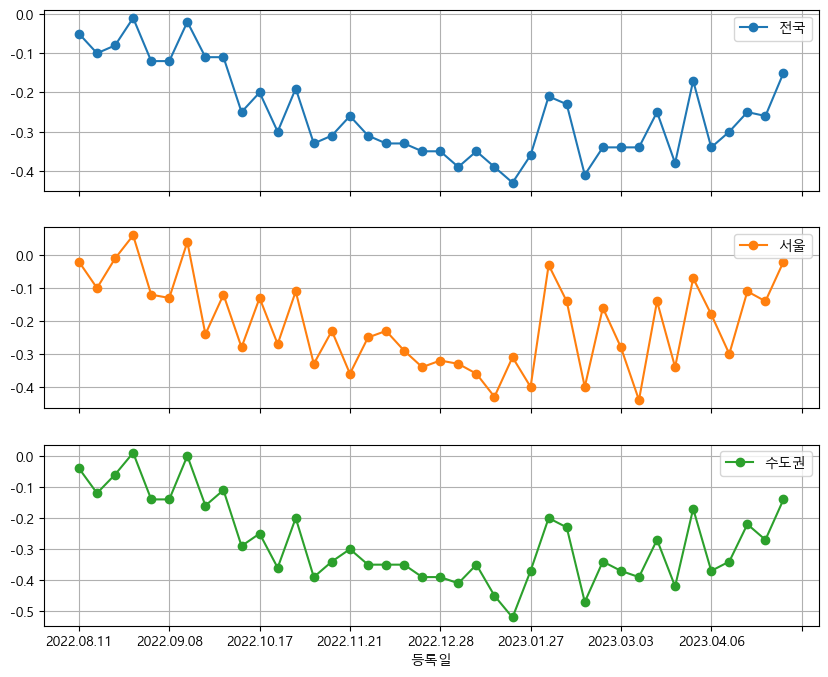

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

df_rates.tail(40).plot(x='등록일', y=['전국', '서울', '수도권'], 
                       figsize=(10, 8), subplots=True, layout=(3,1),
                       style = '-o', grid=True) # 그래프 그리기
plt.show()

### 6.2.5 웹 페이지에서 이미지 가져오기

[6장: 275페이지]

In [148]:
import requests  

image_url = 'https://www.python.org/static/img/python-logo.png' # 이미지 링크(주소)
r = requests.get(image_url) # 이미지 주소의 HTTP 응답 객체
r

<Response [200]>

[6장: 276페이지]

In [149]:
file_name = image_url.split("/")[-1]
file_name

'python-logo.png'

In [150]:
from pathlib import Path

download_folder = 'C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/download' 
image_dir_path = Path(download_folder)

if not image_dir_path.exists():
    image_dir_path.mkdir(parents=True, exist_ok=True)
    
print("생성한 폴더:", download_folder)

생성한 폴더: C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/download


[6장: 277페이지]

In [151]:
image_path = image_dir_path/file_name
image_path

WindowsPath('C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/download/python-logo.png')

[6장: 278페이지]

In [152]:
r = requests.get(image_url) # 이미지 주소의 HTTP 응답 객체
image_data = r.content # 응답 객체(r)을 이용해 받은 이미지 데이터

with open(image_path, 'wb') as f:
    f.write(image_data)

In [153]:
import requests 
from pathlib import Path

# Unsplash의 사진 이미지 주소
image_url = "https://images.unsplash.com/photo-1645956734658-8b6e62e7d35a"
  
file_name = image_url.split("/")[-1] + ".jpg" # 파일 이름 생성(확장자 추가)
download_folder = 'C:/Users/shjo/Desktop/전공/Python-WebScraping-1/data/ch06/download' # 다운로드 폴더 지정

# 지정한 다운로드 폴더를 생성하지 않았으면 생성
image_dir_path = Path(download_folder)
if not image_dir_path.exists():
    image_dir_path.mkdir(parents=True, exist_ok=True)
    
image_path = image_dir_path/file_name # 전체 경로(폴더 + 파일명)

r = requests.get(image_url, stream=True)
if r.status_code == 200:  
    with open(image_path, 'wb') as f:
        for chunk in r.iter_content(1024):
            f.write(chunk)
    print("- 이미지를 다운로드했습니다")
else:
    print("- 지정한 이미지 링크의 응답이 없습니다.")

- 이미지를 다운로드했습니다


## 6.3 정리